# Perceived Stress Scale

In [2]:
import pandas as pd

# Load the data from the CSV file
file_path = './survey/PerceivedStressScale.csv'
pss_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and its columns to understand its structure
pss_data.head(), pss_data.columns

(   uid type  \
 0  u00  pre   
 1  u01  pre   
 2  u02  pre   
 3  u03  pre   
 4  u04  pre   
 
   1. In the last month, how often have you been upset because of something that happened unexpectedly?  \
 0                                           Sometime                                                     
 1                                           Sometime                                                     
 2                                       Fairly often                                                     
 3                                           Sometime                                                     
 4                                       Almost never                                                     
 
   2. In the last month, how often have you felt that you were unable to control the important things in your life?  \
 0                                           Sometime                                                                 
 1                  

In [3]:
for column in pss_data.columns[2:5]:  # Check first three survey columns
    print(f"Unique values in {column}: {pss_data[column].astype(str).str.strip().str.title().unique()}")
    
response_mapping = {
    'Never': 0,
    'Almost Never': 1,
    'Sometime': 2,
    'Fairly Often': 3,
    'Very Often' : 4
}

for column in pss_data.columns[2:]:  # Assuming first two columns are 'uid' and 'type'
    pss_data[column] = pss_data[column].astype(str).str.title().map(response_mapping)

Unique values in 1. In the last month, how often have you been upset because of something that happened unexpectedly?: ['Sometime' 'Fairly Often' 'Almost Never' 'Very Often' 'Never']
Unique values in 2. In the last month, how often have you felt that you were unable to control the important things in your life?: ['Sometime' 'Almost Never' 'Fairly Often' 'Never' 'Very Often']
Unique values in 3. In the last month, how often have you felt nervous and "stressed"?: ['Fairly Often' 'Sometime' 'Almost Never' 'Very Often' 'Nan']


In [4]:
print("NaN counts after mapping:")
print(pss_data.isna().sum())

pss_data.fillna(2, inplace=True)  # Assuming 2 is the neutral score

NaN counts after mapping:
uid                                                                                                                     0
type                                                                                                                    0
1. In the last month, how often have you been upset because of something that happened unexpectedly?                    0
2. In the last month, how often have you felt that you were unable to control the important things in your life?        0
3. In the last month, how often have you felt nervous and "stressed"?                                                   1
4. In the last month, how often have you felt confident about your ability to handle your personal problems?            0
5. In the last month, how often have you felt that things were going your way?                                          1
6. In the last month, how often have you found that you could not cope with all the things that you had to do?          

In [5]:
print("Unique 'type' values before adjustment:", pss_data['type'].unique())

# Normalize 'type' field for consistency
pss_data['type'] = pss_data['type'].str.strip().str.title()

# Verify 'uid' consistency and format
print("Unique 'uid' values check (sample):", pss_data['uid'].sample(5))

# Identify participants who have both Pre and Post data
pre_participants = set(pss_data[pss_data['type'] == 'Pre']['uid'])
post_participants = set(pss_data[pss_data['type'] == 'Post']['uid'])
common_participants = pre_participants & post_participants

print(f"Number of participants in Pre only: {len(pre_participants)}")
print(f"Number of participants in Post only: {len(post_participants)}")
print(f"Number of common participants: {len(common_participants)}")

# Filter datasets to only include common participants
pre_data = pss_data[(pss_data['type'] == 'Pre') & (pss_data['uid'].isin(common_participants))]
post_data = pss_data[(pss_data['type'] == 'Post') & (pss_data['uid'].isin(common_participants))]

# Save the filtered data
pre_data.to_csv('./data/PSS/PSS_Pre.csv', index=False)
post_data.to_csv('./data/PSS/PSS_Post.csv', index=False)

# Check final data counts
print("Final Pre data counts (non-NaN):")
print(pre_data.count())
print("\nFinal Post data counts (non-NaN):")
print(post_data.count())

Unique 'type' values before adjustment: ['pre' 'post']
Unique 'uid' values check (sample): 80    u52
2     u02
15    u17
56    u15
55    u14
Name: uid, dtype: object
Number of participants in Pre only: 46
Number of participants in Post only: 39
Number of common participants: 39
Final Pre data counts (non-NaN):
uid                                                                                                                     39
type                                                                                                                    39
1. In the last month, how often have you been upset because of something that happened unexpectedly?                    39
2. In the last month, how often have you felt that you were unable to control the important things in your life?        39
3. In the last month, how often have you felt nervous and "stressed"?                                                   39
4. In the last month, how often have you felt confident about your abilit

In [6]:
pre_data = pd.read_csv('./data/PSS/PSS_Pre.csv')
post_data = pd.read_csv('./data/PSS/PSS_Post.csv')

# Check final data counts
print("Final Pre data counts (non-NaN):")
print(pre_data.count())
print("\nFinal Post data counts (non-NaN):")
print(post_data.count())

# calculate the sum of the scores for each participant
pre_data['total_score'] = pre_data.iloc[:, 2:].sum(axis=1)
post_data['total_score'] = post_data.iloc[:, 2:].sum(axis=1)

# Save the total scores
pre_data.to_csv('./data/PSS/PSS_Pre.csv', index=False)
post_data.to_csv('./data/PSS/PSS_Post.csv', index=False)

Final Pre data counts (non-NaN):
uid                                                                                                                     39
type                                                                                                                    39
1. In the last month, how often have you been upset because of something that happened unexpectedly?                    39
2. In the last month, how often have you felt that you were unable to control the important things in your life?        39
3. In the last month, how often have you felt nervous and "stressed"?                                                   39
4. In the last month, how often have you felt confident about your ability to handle your personal problems?            39
5. In the last month, how often have you felt that things were going your way?                                          39
6. In the last month, how often have you found that you could not cope with all the things that you had to

In [7]:
# Calculate the mean,median,mode,SD total score for each group

pre_mean = pre_data['total_score'].mean()
post_mean = post_data['total_score'].mean()
pre_median = pre_data['total_score'].median()
post_median = post_data['total_score'].median()
pre_mode = pre_data['total_score'].mode()
post_mode = post_data['total_score'].mode()
pre_sd = pre_data['total_score'].std()
post_sd = post_data['total_score'].std()

print(f"Pre Mean: {pre_mean}")
print(f"Post Mean: {post_mean}")
print(f"Pre Median: {pre_median}")
print(f"Post Median: {post_median}")
print(f"Pre Mode: {pre_mode}")
print(f"Post Mode: {post_mode}")
print(f"Pre Standard Deviation: {pre_sd}")
print(f"Post Standard Deviation: {post_sd}")

Pre Mean: 21.256410256410255
Post Mean: 21.435897435897434
Pre Median: 21.0
Post Median: 21.0
Pre Mode: 0    20.0
Name: total_score, dtype: float64
Post Mode: 0    20.0
1    24.0
Name: total_score, dtype: float64
Pre Standard Deviation: 3.951801379504027
Post Standard Deviation: 3.9188805584387287


## Visualization of Data

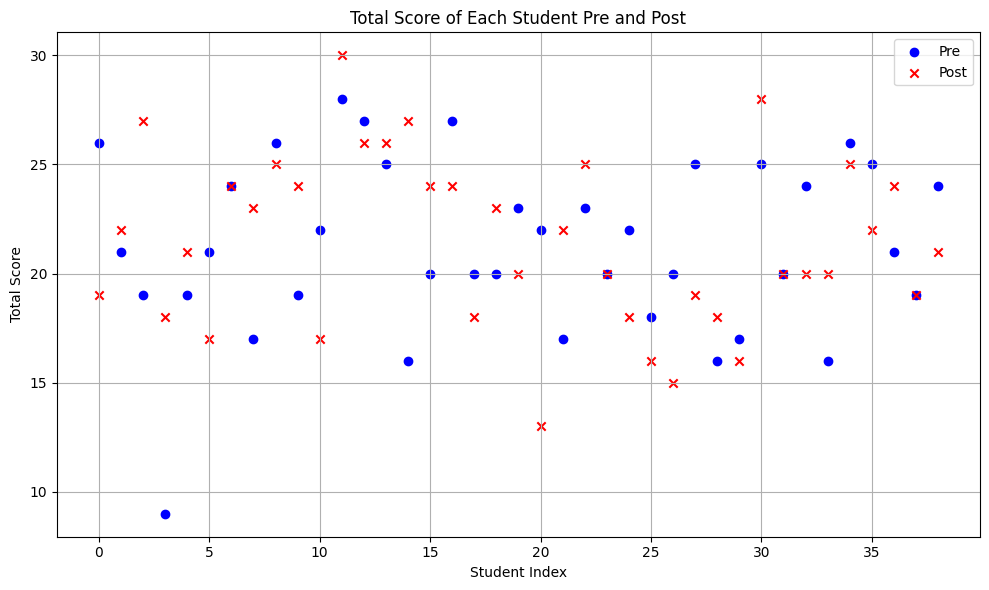

In [8]:
import matplotlib.pyplot as plt

# Load the pre and post datasets
pre_data = pd.read_csv('./data/PSS/PSS_Pre.csv')
post_data = pd.read_csv('./data/PSS/PSS_Post.csv')

# Plot the total score for each student pre and post
plt.figure(figsize=(10, 6))

# Plot pre data
plt.scatter(pre_data.index, pre_data['total_score'], label='Pre', color='blue', marker='o')

# Plot post data
plt.scatter(post_data.index, post_data['total_score'], label='Post', color='red', marker='x')

# Add labels and title
plt.xlabel('Student Index')
plt.ylabel('Total Score')
plt.title('Total Score of Each Student Pre and Post')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(pre_data['total_score'], post_data['total_score'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between the pre and post scores.")
else:
    print("There is no statistically significant difference between the pre and post scores.")

T-statistic: -0.2540486723109299
P-value: 0.8008276225934345
There is no statistically significant difference between the pre and post scores.
